In [145]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [146]:
df = pd.read_csv("Hitters.csv")

### Exploratory Data Analysis

In [147]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [148]:
df.shape

(322, 20)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [150]:
#unique observation numbers
df.nunique()

AtBat        247
Hits         144
HmRun         36
Runs          96
RBI          103
Walks         89
Years         22
CAtBat       314
CHits        288
CHmRun       146
CRuns        261
CRBI         262
CWalks       248
League         2
Division       2
PutOuts      232
Assists      161
Errors        29
Salary       150
NewLeague      2
dtype: int64

In [151]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


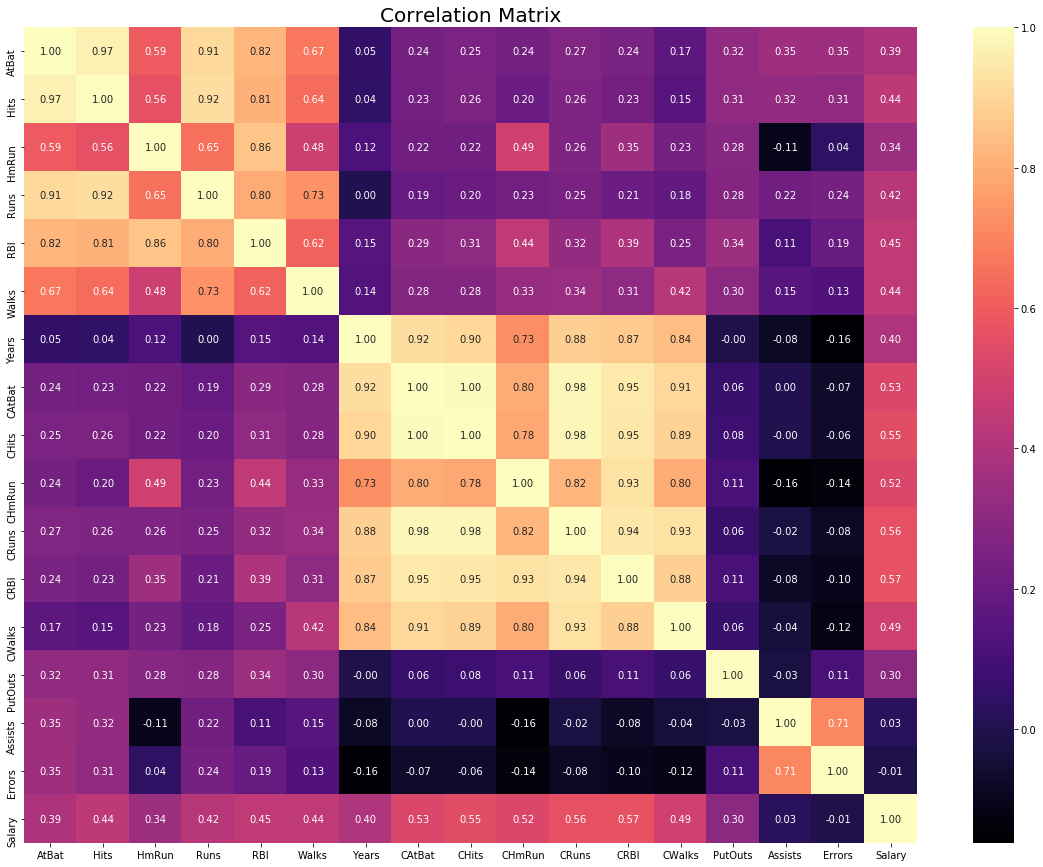

In [152]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [153]:
#average salaries of leagues
df.groupby("League").agg({"Salary": "mean"})

,Salary
League,
A,541.999547
N,529.117500


In [154]:
#sorting CHits variable by many
df.sort_values("CHits",ascending = False)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
236,237,52,0,15,25,30,24,14053,4256,160,2165,1314,1566,N,W,523,43,6,750.000,N
302,200,51,2,14,29,25,23,9778,2732,379,1272,1652,925,N,W,398,29,7,NaN,N
278,557,142,21,58,81,23,18,8759,2583,271,1138,1299,478,N,W,1160,53,7,1450.000,N
249,419,101,18,65,58,92,20,9528,2510,548,1509,1659,1342,A,W,0,0,0,487.500,A
24,629,168,18,73,102,40,18,8424,2464,164,1008,1072,402,A,E,1067,157,14,776.667,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,19,7,0,1,2,1,4,41,13,1,3,4,4,A,E,0,0,0,NaN,A
217,20,1,0,0,0,0,2,41,9,2,6,7,4,N,E,78,220,6,2127.333,N
250,33,6,0,2,4,7,1,33,6,0,2,4,7,A,W,205,5,4,NaN,A
283,16,2,0,1,0,0,2,28,4,0,1,0,0,A,E,247,4,8,NaN,A


# Data Pre-Processing

### Creating New Variables

In [155]:
df["Mean_CAtBat"] = df["CAtBat"] / df["Years"]
df["Mean_CHits"] = df["CHits"] / df["Years"]
df["Mean_CHmRun"] = df["CHmRun"] / df["Years"]
df["Mean_Cruns"] = df["CRuns"] / df["Years"]
df["Mean_CRBI"] = df["CRBI"] / df["Years"]
df["Mean_CWalks"] = cwalks = df["CWalks"] / df["Years"]
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Assists,Errors,Salary,NewLeague,Mean_CAtBat,Mean_CHits,Mean_CHmRun,Mean_Cruns,Mean_CRBI,Mean_CWalks
0,293,66,1,30,29,14,1,293,66,1,...,33,20,NaN,A,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000
1,315,81,7,24,38,39,14,3449,835,69,...,43,10,475.0,N,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714
2,479,130,18,66,72,76,3,1624,457,63,...,82,14,480.0,A,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667
3,496,141,20,65,78,37,11,5628,1575,225,...,11,3,500.0,N,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818
4,321,87,10,39,42,30,2,396,101,12,...,40,4,91.5,N,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000


In [156]:
df = df.drop(['AtBat','Hits','HmRun','Runs','RBI','Walks','Assists','Errors',"PutOuts",'League','NewLeague'], axis=1)

In [157]:
df.head()

,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Division,Salary,Mean_CAtBat,Mean_CHits,Mean_CHmRun,Mean_Cruns,Mean_CRBI,Mean_CWalks
0,1,293,66,1,30,29,14,E,NaN,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000
1,14,3449,835,69,321,414,375,W,475.0,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714
2,3,1624,457,63,224,266,263,W,480.0,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667
3,11,5628,1575,225,828,838,354,E,500.0,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818
4,2,396,101,12,48,46,33,E,91.5,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000


### One Hot Encoding Transformation

In [158]:
df = pd.get_dummies(df, columns =["Division"], drop_first = True)

In [159]:
df.head()

,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Salary,Mean_CAtBat,Mean_CHits,Mean_CHmRun,Mean_Cruns,Mean_CRBI,Mean_CWalks,Division_W
0,1,293,66,1,30,29,14,NaN,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000,0
1,14,3449,835,69,321,414,375,475.0,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714,1
2,3,1624,457,63,224,266,263,480.0,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667,1
3,11,5628,1575,225,828,838,354,500.0,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818,0
4,2,396,101,12,48,46,33,91.5,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000,0


### Missing Observation Analysis

In [160]:
df.isnull().sum()

Years           0
CAtBat          0
CHits           0
CHmRun          0
CRuns           0
CRBI            0
CWalks          0
Salary         59
Mean_CAtBat     0
Mean_CHits      0
Mean_CHmRun     0
Mean_Cruns      0
Mean_CRBI       0
Mean_CWalks     0
Division_W      0
dtype: int64

In [161]:
df_missing = df[df["Salary"].isnull()].head()
df_missing

,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Salary,Mean_CAtBat,Mean_CHits,Mean_CHmRun,Mean_Cruns,Mean_CRBI,Mean_CWalks,Division_W
0,1,293,66,1,30,29,14,NaN,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000,0
15,3,201,42,3,20,16,11,NaN,67.000000,14.000000,1.000000,6.666667,5.333333,3.666667,1
18,12,5233,1478,100,643,658,653,NaN,436.083333,123.166667,8.333333,53.583333,54.833333,54.416667,1
22,6,84,26,2,9,9,3,NaN,14.000000,4.333333,0.333333,1.500000,1.500000,0.500000,1
30,17,6890,1833,224,1033,864,1087,NaN,405.294118,107.823529,13.176471,60.764706,50.823529,63.941176,1


### Filling Missing Observation Units

In [162]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
df_filled = imputer.fit_transform(df)

In [163]:
df = pd.DataFrame(df_filled,columns = df.columns)
df.isnull().sum()

Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
Salary         0
Mean_CAtBat    0
Mean_CHits     0
Mean_CHmRun    0
Mean_Cruns     0
Mean_CRBI      0
Mean_CWalks    0
Division_W     0
dtype: int64

## Simple Linear Regression

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [165]:
X = df[["Mean_CHits"]]
y = df[["Salary"]]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [166]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
reg_model.intercept_ 

array([520.1846892])

In [168]:
reg_model.coef_

array([[233.5779452]])

In [169]:
#train error
y_pred = reg_model.predict(X_train)
reg_model_simple_train_error = np.sqrt(mean_squared_error(y_train, y_pred))
reg_model_simple_train_error

366.91520747933646

In [170]:
#test error
y_pred = reg_model.predict(X_test)
reg_model_simple_test_error = np.sqrt(mean_squared_error(y_test, y_pred))
reg_model_simple_test_error

306.28119895644664

In [171]:
from sklearn.model_selection import cross_val_score
np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

370.3438423962044

## Polynomial Linear Regression

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [173]:
y = df["Salary"]
X = df.drop("Salary",axis=1)
X = scaler.fit_transform(X)

In [174]:
for i in range(len(X)):
    if X[i][13]<0:
        X[i][13]=0
    else:
        X[i][13]=1  

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [176]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
reg_model.intercept_

586.2884637131672

In [178]:
reg_model.coef_

array([-7.47629923e+01,  7.11802081e+02, -1.00760415e+03, -1.00026893e+00,
        4.97146068e+02,  2.37718871e+02, -2.06625817e+02, -7.98796695e+02,
        7.85879221e+02, -6.24221615e+01, -2.96481895e+01,  1.22631175e+02,
        1.20498986e+02, -1.01114677e+02])

In [179]:
#train error
y_pred = reg_model.predict(X_train)
reg_model_train_error = np.sqrt(mean_squared_error(y_train, y_pred))
reg_model_train_error

300.837651086288

In [180]:
#test error
y_pred = reg_model.predict(X_test)
reg_model_test_error = np.sqrt(mean_squared_error(y_test, y_pred))
reg_model_test_error

313.11901413074855

In [181]:
from sklearn.model_selection import cross_val_score
np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

326.05687598286426

## Ridge Regression

In [182]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [183]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [184]:
ridge_model.intercept_

585.9434651229018

In [185]:
ridge_model.coef_

array([ -28.37498861,   31.0066189 ,  -53.4722761 ,  133.87673165,
        179.08813064,   34.48499916, -105.36099888, -478.95507491,
        368.12433572, -118.34430874,   74.73879062,  194.58022193,
         79.00508112, -100.68976698])

In [186]:
#train error
y_pred = ridge_model.predict(X_train)
ridge_model_train_error = np.sqrt(mean_squared_error(y_train, y_pred))
ridge_model_train_error

303.4897505792028

In [187]:
#test error
y_pred = ridge_model.predict(X_test)
ridge_model_test_error = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_model_test_error

310.4109086575797

In [188]:
from sklearn.model_selection import cross_val_score
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

323.1608139850178

#### Model Hyperparameter Optimization

In [189]:
ridge_model

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [190]:
alphas1 = np.random.randint(0,1000,100)
alphas2 = 10**np.linspace(10,-2,100)*0.5
alphas3 = np.linspace(0,1,1000)
alphas4 = np.arange(100,10000,10) 

In [191]:
ridge_cv = RidgeCV(alphas = alphas3, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.0...
       0.97597598, 0.97697698, 0.97797798, 0.97897898, 0.97997998,
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [192]:
ridge_cv.alpha_

0.007007007007007007

In [193]:
ridge_alpha = ridge_cv.alpha_

### Final Model

In [194]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_)
ridge_tuned.fit(X_train, y_train)

Ridge(alpha=0.007007007007007007, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

### Final Model Test Error

In [195]:
y_pred = ridge_tuned.predict(X_test)
ridge_final_error = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_final_error

312.9465988464665

## Lasso Regression

In [196]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [197]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [198]:
lasso_model.intercept_

584.3726446901568

In [199]:
lasso_model.coef_

array([ -16.54367921,    0.        ,   -0.        ,  147.69193737,
        138.9661269 ,    0.        ,  -78.41049821, -512.86982203,
        427.32528211, -101.86271662,   64.9540425 ,  176.33092837,
         72.36393552,  -97.82800942])

In [200]:
#train error
y_pred = lasso_model.predict(X_train)
lasso_model_train_error = np.sqrt(mean_squared_error(y_train, y_pred))
lasso_model_train_error

303.50206511250684

In [201]:
#test error
y_pred = lasso_model.predict(X_test)
lasso_model_test_error = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_model_test_error

307.70967017785495

In [202]:
np.sqrt(np.mean(-cross_val_score(lasso_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

322.8852869891447

### Model Hyperparameter Optimization

In [203]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [204]:
alphas1 = np.random.randint(0,1000,100)
alphas2 = 10**np.linspace(10,-2,100)*0.5
alphas3 = np.linspace(0,1,1000)
alphas4 = np.arange(100,10000,10) 

In [205]:
lasso_cv = LassoCV(alphas = alphas3, cv = 10)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.0...
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ]),
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [206]:
lasso_cv.alpha_

0.9669669669669669

### Final Model

In [207]:
lasso_tuned = Lasso(alpha = lasso_cv.alpha_)
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.9669669669669669, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Final Model Test Error

In [208]:
y_pred = lasso_tuned.predict(X_test)
lasso_final_error = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_final_error

307.75308431551156

## ElasticNet Regression

In [209]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

In [210]:
enet_model = ElasticNet()
enet_model.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [211]:
enet_model.intercept_

555.2854668088015

In [212]:
enet_model.coef_

array([  5.55830342,  16.54243853,  29.17630849,  42.12749276,
        35.14197622,  39.55606272,  13.00490281,  -2.9890377 ,
        33.77775176,  17.43305114,  30.20186326,  41.09634353,
        21.08429359, -43.15973576])

In [213]:
#train error
y_pred = enet_model.predict(X_train)
enet_model_train_error = np.sqrt(mean_squared_error(y_train, y_pred))
enet_model_train_error

328.1549320981473

In [214]:
#test error
y_pred = enet_model.predict(X_test)
enet_model_test_error = np.sqrt(mean_squared_error(y_test, y_pred))
enet_model_test_error

307.40472056987363

In [215]:
np.sqrt(np.mean(-cross_val_score(enet_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

335.44038090761626

### Model Hyperparameter Optimization

In [216]:
enet_model

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [217]:
enet_params = {"l1_ratio": [0.1,0.4,0.5,0.6,0.8,1],
              "alpha": np.linspace(0,1,1000)}

In [218]:
enet_model = ElasticNet()
enet_model.fit(X_train, y_train)
from sklearn.model_selection import GridSearchCV
gs_cv_enet = GridSearchCV(enet_model, enet_params, cv = 10).fit(X_train, y_train)

In [219]:
gs_cv_enet.best_params_

{'alpha': 0.04004004004004004, 'l1_ratio': 0.8}

### Final Model

In [220]:
enet_tuned = ElasticNet(**gs_cv_enet.best_params_)
enet_tuned.fit(X_train, y_train)

ElasticNet(alpha=0.04004004004004004, copy_X=True, fit_intercept=True,
           l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

### Final Model Test Error

In [221]:
y_pred = enet_tuned.predict(X_test)
enet_final_error = np.sqrt(mean_squared_error(y_test, y_pred))
enet_final_error

310.77724600491933

# Comparison of All Models

In [222]:
models = [
    reg_model,
    ridge_tuned,
    lasso_tuned,
    enet_tuned,]


for model in models:
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, y_pred))
    print("-"*28)
    print(model_name + ";" )
    print("Error: " + str(error))

----------------------------
LinearRegression;
Error: 313.11901413074855
----------------------------
Ridge;
Error: 312.9465988464665
----------------------------
Lasso;
Error: 307.75308431551156
----------------------------
ElasticNet;
Error: 310.77724600491933


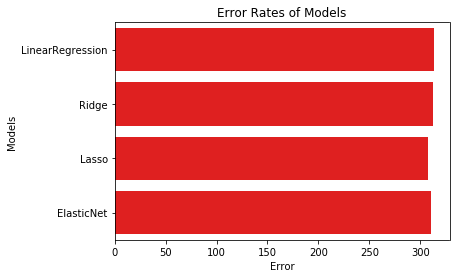

In [223]:
result = []

results = pd.DataFrame(columns= ["Models","Error"])

for model in models:
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, y_pred))    
    result = pd.DataFrame([[model_name, error]], columns= ["Models","Error"])
    results = results.append(result)
    
    
sns.barplot(x= 'Error', y = 'Models', data=results, color="r")
plt.xlabel('Error')
plt.title('Error Rates of Models');  

In [224]:
results_df = pd.DataFrame({"Train Error":[reg_model_simple_train_error, reg_model_train_error, ridge_model_train_error, lasso_model_train_error, enet_model_train_error],
                              "Test Error":[reg_model_simple_test_error, reg_model_test_error, ridge_model_test_error, lasso_model_test_error, enet_model_test_error],                              
                              "Test Tuned Error":["No","No",ridge_final_error, lasso_final_error,enet_final_error],
                               "Alpha Values": ["No", "No", ridge_alpha,lasso_alpha, enet_alpha]})
results_df.index= ["Simple_LR_Detail", "Polynomial_LR_Detail","Ridge_Detail","Lasso_Detail","ENet_Detail"]

In [225]:
results_df

,Train Error,Test Error,Test Tuned Error,Alpha Values
Simple_LR_Detail,366.915207,306.281199,No,No
Polynomial_LR_Detail,300.837651,313.119014,No,No
Ridge_Detail,303.489751,310.410909,312.947,0.00700701
Lasso_Detail,303.502065,307.709670,307.753,0.966967
ENet_Detail,328.154932,307.404721,310.777,0.004004


## Result

In this project, 4 machine learning models were established and the error scores were tried to be minimized. The following has been done in this project.

    - Hitters Data Set read.
    - Structural information of the dataset was examined
    - Variables with object type converted to categorical type
    - missing observations were deleted from the dataset.
    - visualization done
    - Creating New Variables, One Hot Encoding Transformation and Missing Observation Analysis transactions were made
    - Linear, Ridge, Lasso, ElasticNet models were applied
    - Model errors representing the difference between real values and predicted values were calculated.
    - Hyperparameter optimizations were applied for Ridge, Lasso and ElasticNet to reduce the error value.